<a href="https://colab.research.google.com/github/RaphaelCarvalh/BootCampAVANTI_machine_learning/blob/ativ04-et01-analise-dataset/Et01_analise_dataset_refact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Clothing Co-Parsing - Etapa 1 - Notebook: Análise do Dataset - TIV-04-ET-01


1. Preparação do Ambiente e Download do Dataset

In [3]:
# 1. Instalação de pacotes necessários
print("Instalando pacotes necessários...")
!pip install opendatasets pandas imagehash matplotlib opencv-python pillow --quiet
print("Pacotes instalados com sucesso.\n")

# 2. Importações iniciais
import os
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import imagehash
%matplotlib inline

print("Pacotes importados com sucesso.\n")

# 3. Download do dataset do Kaggle
dataset_url = "https://www.kaggle.com/datasets/balraj98/clothing-coparsing-dataset"
print(f"Baixando o dataset do Kaggle: {dataset_url}")
od.download(dataset_url)
print("Download concluído.\n")

# 4. Definir caminhos principais
BASE_DIR = "./clothing-coparsing-dataset"
IMAGES_DIR = os.path.join(BASE_DIR, "images")
LABELS_DIR = os.path.join(BASE_DIR, "labels")
METADATA_PATH = os.path.join(BASE_DIR, "metadata.csv")

print("Verificando a estrutura de pastas do dataset:")
print("Pasta de imagens:", os.path.exists(IMAGES_DIR))
print("Pasta de labels:", os.path.exists(LABELS_DIR))
print("Arquivo metadata:", os.path.exists(METADATA_PATH))
print("\nConteúdo da pasta de imagens (amostra):")
print(os.listdir(IMAGES_DIR)[:5])
print("\nConteúdo da pasta de labels (amostra):")
print(os.listdir(LABELS_DIR)[:5])
print("\nArquivo metadata (amostra):")
print(pd.read_csv(METADATA_PATH).head())

Instalando pacotes necessários...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.7 MB/s eta 0:00:00
Pacotes instalados com sucesso.

Pacotes importados com sucesso.

Baixando o dataset do Kaggle: https://www.kaggle.com/datasets/balraj98/clothing-coparsing-dataset
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: raphaelmdecarvalho
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/balraj98/clothing-coparsing-dataset


100%|██████████| 134M/134M [00:00<00:00, 462MB/s] 

Download concluído.

Verificando a estrutura de pastas do dataset:
Pasta de imagens: True
Pasta de labels: True
Arquivo metadata: True

Conteúdo da pasta de imagens (amostra):
['1433.jpg', '0621.jpg', '1649.jpg', '0667.jpg', '2052.jpg']

Conteúdo da pasta de labels (amostra):
['image_level_labels_txt', 'pixel_level_labels_colored']

Arquivo metadata (amostra):
   image_id       image_path   label_type  \
0         1  images/0001.jpg  pixel-level   
1         2  images/0002.jpg  pixel-level   
2         3  images/0003.jpg  pixel-level   
3         4  images/0004.jpg  pixel-level   
4         5  images/0005.jpg  pixel-level   

                            label_path                   raw_label_path  
0  pixel_level_labels_colored/0001.png  pixel_level_labels_mat/0001.mat  
1  pixel_level_labels_colored/0002.png  pixel_level_labels_mat/0002.mat  
2  pixel_level_labels_colored/0003.png  pixel_level_labels_mat/0003.mat  
3  pixel_level_labels_colored/0004.png  pixel_level_labels_mat/0004.ma

Módulo 2 – DataFrame de Imagens e Labels

In [4]:
print("Iniciando a construção do DataFrame de imagens...")

# Lista para armazenar os dados
dataframe_list = []

# Contador de imagens corrompidas
count_corrupted = 0
corrupted_images = []

# Carregar metadata
metadata_df = pd.read_csv(METADATA_PATH)
print(f"Metadata carregado: {metadata_df.shape[0]} entradas encontradas.\n")

# Iterar sobre todas as imagens
for image_name in os.listdir(IMAGES_DIR):
    image_path = os.path.join(IMAGES_DIR, image_name)

    # Ignorar se não for arquivo
    if not os.path.isfile(image_path):
        continue

    try:
        # Ler imagem com OpenCV
        img = cv2.imread(image_path)
        if img is not None:
            # Converter BGR -> RGB para PIL
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_pil = Image.fromarray(img_rgb)

            # Calcular hash da imagem
            img_hash = imagehash.phash(img_pil)

            # Dimensões
            height, width, channels = img.shape

            corrupted = False
        else:
            raise ValueError("Imagem corrompida ou não pode ser aberta")
    except Exception as e:
        count_corrupted += 1
        corrupted_images.append(image_path)
        img_hash = None
        width = height = channels = None
        corrupted = True

    # Populando a coluna 'label' a partir do metadata
    # Procurar pelo image_path relativo no metadata
    row_meta = metadata_df[metadata_df['image_path'].str.endswith(image_name)]
    if not row_meta.empty:
        label = row_meta.iloc[0]['label_type']  # ou 'label_path', dependendo da análise
    else:
        label = None

    # Adicionar linha ao dataframe
    dataframe_list.append([image_path, corrupted, img_hash, width, height, channels, label])

# Criar DataFrame final
df = pd.DataFrame(
    dataframe_list,
    columns=['image_path', 'corrupted', 'image_hash', 'width', 'height', 'channels', 'label']
)

print(f"DataFrame criado com {len(df)} imagens.")
print(f"Total de imagens corrompidas: {count_corrupted}\n")

# Mostrar as primeiras linhas
df.head()


Iniciando a construção do DataFrame de imagens...
Metadata carregado: 2098 entradas encontradas.

DataFrame criado com 2098 imagens.
Total de imagens corrompidas: 0



,image_path,corrupted,image_hash,width,height,channels,label
0,./clothing-coparsing-dataset/images/1433.jpg,False,b4538fc9136c6cd2,550,831,3,image-level
1,./clothing-coparsing-dataset/images/0621.jpg,False,f3b5a45b4b241c8d,550,832,3,pixel-level
2,./clothing-coparsing-dataset/images/1649.jpg,False,b35889a266594bf3,550,828,3,image-level
3,./clothing-coparsing-dataset/images/0667.jpg,False,b3f6cb834c5d2438,550,842,3,pixel-level
4,./clothing-coparsing-dataset/images/2052.jpg,False,abf3d2a563cc8c18,550,834,3,image-level


3. Verificação de integridade dos arquivos

Verificando integridade dos arquivos...

Total de imagens listadas no metadata: 2098
Total de imagens na pasta: 2098
Imagens listadas mas ausentes na pasta: 0
Imagens na pasta mas não listadas no metadata: 0

Distribuição de formatos de imagens:
- jpg: 2098 imagens


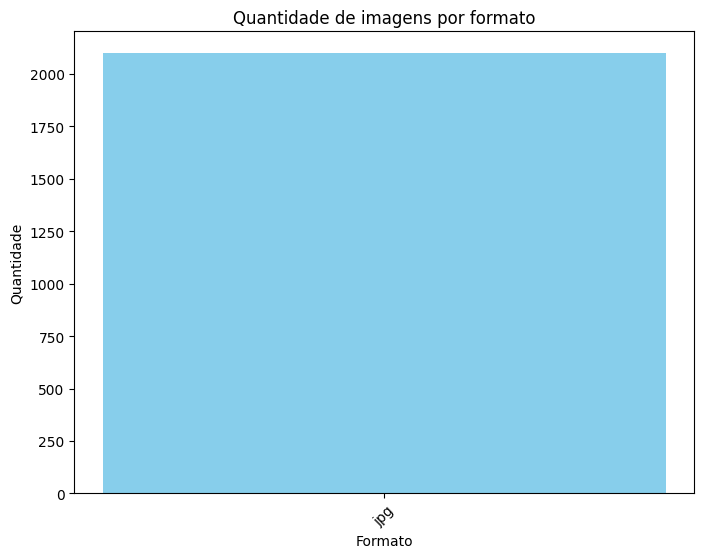

In [5]:
print("Verificando integridade dos arquivos...\n")

# Conjunto de imagens listadas no metadata
listed_images = set(metadata_df['image_path'].apply(lambda x: os.path.basename(x)))

# Conjunto de imagens realmente presentes na pasta
actual_images = set([f for f in os.listdir(IMAGES_DIR) if os.path.isfile(os.path.join(IMAGES_DIR, f))])

# Imagens faltantes
missing_images = listed_images - actual_images
extra_images = actual_images - listed_images

print(f"Total de imagens listadas no metadata: {len(listed_images)}")
print(f"Total de imagens na pasta: {len(actual_images)}")
print(f"Imagens listadas mas ausentes na pasta: {len(missing_images)}")
print(f"Imagens na pasta mas não listadas no metadata: {len(extra_images)}\n")

# Verificando formatos de imagens
formats_counter = {}
for img_name in actual_images:
    try:
        ext = img_name.split('.')[-1].lower()
        formats_counter[ext] = formats_counter.get(ext, 0) + 1
    except:
        continue

print("Distribuição de formatos de imagens:")
for fmt, count in formats_counter.items():
    print(f"- {fmt}: {count} imagens")

# Gráfico de formatos
plt.figure(figsize=(8,6))
plt.bar(formats_counter.keys(), formats_counter.values(), color='skyblue')
plt.title("Quantidade de imagens por formato")
plt.xlabel("Formato")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()


4. Consistência dos metadados

Verificando consistência dos metadados...

Valores ausentes no metadata.csv:
image_id          0
image_path        0
label_type        0
label_path        0
raw_label_path    0
dtype: int64

Valores ausentes no DataFrame de imagens:
image_path    0
corrupted     0
image_hash    0
width         0
height        0
channels      0
label         0
dtype: int64

Gerando gráfico de distribuição de largura x altura das imagens...


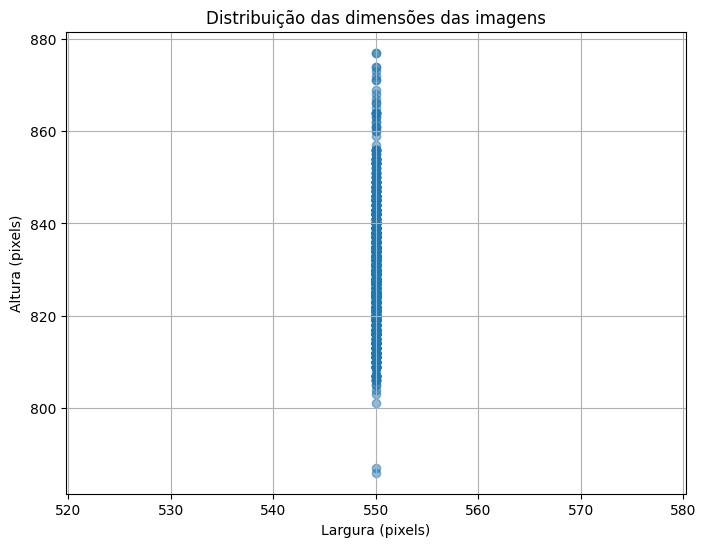


Estatísticas básicas das dimensões das imagens:
        width       height
count  2098.0  2098.000000
mean    550.0   828.497140
std       0.0    10.728418
min     550.0   786.000000
25%     550.0   822.000000
50%     550.0   827.000000
75%     550.0   834.000000
max     550.0   877.000000


In [6]:
print("Verificando consistência dos metadados...\n")

# Valores ausentes no metadata original
missing_metadata = metadata_df.isnull().sum()
print("Valores ausentes no metadata.csv:")
print(missing_metadata)

# Valores ausentes no DataFrame final (imagens + labels)
missing_df = df.isnull().sum()
print("\nValores ausentes no DataFrame de imagens:")
print(missing_df)

# Distribuição das dimensões das imagens
print("\nGerando gráfico de distribuição de largura x altura das imagens...")
plt.figure(figsize=(8,6))
plt.scatter(df['width'], df['height'], alpha=0.5)
plt.title("Distribuição das dimensões das imagens")
plt.xlabel("Largura (pixels)")
plt.ylabel("Altura (pixels)")
plt.grid(True)
plt.show()

# Estatísticas básicas das dimensões
print("\nEstatísticas básicas das dimensões das imagens:")
dim_stats = df[['width', 'height']].describe()
print(dim_stats)


5. Qualidade das imagens

Verificando a qualidade das imagens...

Total de imagens verificadas: 2098
Total de imagens corrompidas: 0

Nenhuma imagem corrompida encontrada.


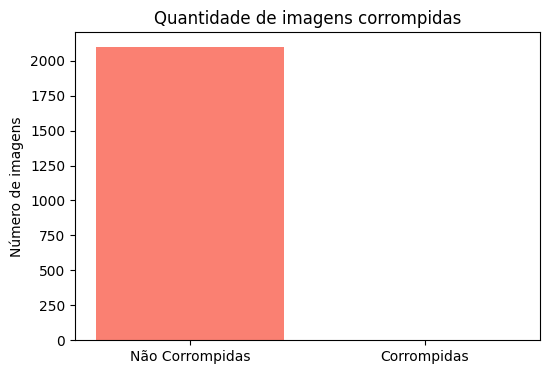

In [7]:
print("Verificando a qualidade das imagens...\n")

corrupted_images = []

for img_name in os.listdir(IMAGES_DIR):
    img_path = os.path.join(IMAGES_DIR, img_name)
    try:
        img = Image.open(img_path)
        img.verify()  # Verifica se a imagem está corrompida
    except (IOError, SyntaxError):
        corrupted_images.append(img_name)

print(f"Total de imagens verificadas: {len(os.listdir(IMAGES_DIR))}")
print(f"Total de imagens corrompidas: {len(corrupted_images)}")

if corrupted_images:
    print("\nLista de imagens corrompidas:")
    for img in corrupted_images:
        print(f"- {img}")
else:
    print("\nNenhuma imagem corrompida encontrada.")

# Atualizando a coluna 'corrupted' no DataFrame
df['corrupted'] = df['image_path'].apply(lambda x: os.path.basename(x) in corrupted_images)

# Gráfico: imagens corrompidas x não corrompidas
corrupted_counts = df['corrupted'].value_counts()
categories = ['Não Corrompidas', 'Corrompidas']
counts = [corrupted_counts.get(False, 0), corrupted_counts.get(True, 0)]

plt.figure(figsize=(6,4))
plt.bar(categories, counts, color='salmon')
plt.title("Quantidade de imagens corrompidas")
plt.ylabel("Número de imagens")
plt.show()



6. Distribuição das Classes e Duplicatas

Iniciando Módulo 6: Distribuição das Classes e Duplicatas...

Gerando gráfico da quantidade de imagens por classe...

Verificando duplicatas no metadata...
Nenhuma duplicata encontrada no metadata.


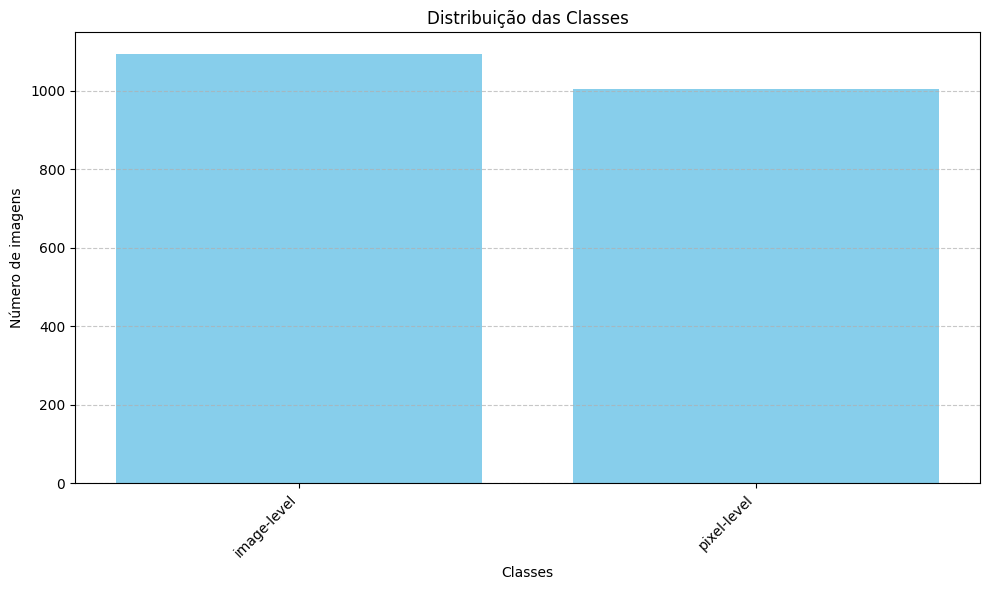


Número de imagens por classe:
- image-level: 1094 imagens
- pixel-level: 1004 imagens

Verificando imagens duplicadas pelo hash...
Encontradas 2 imagens duplicadas.

Hash duplicado: b69cd0f21d1d51f0, imagens: ['./clothing-coparsing-dataset/images/0025.jpg', './clothing-coparsing-dataset/images/1707.jpg']


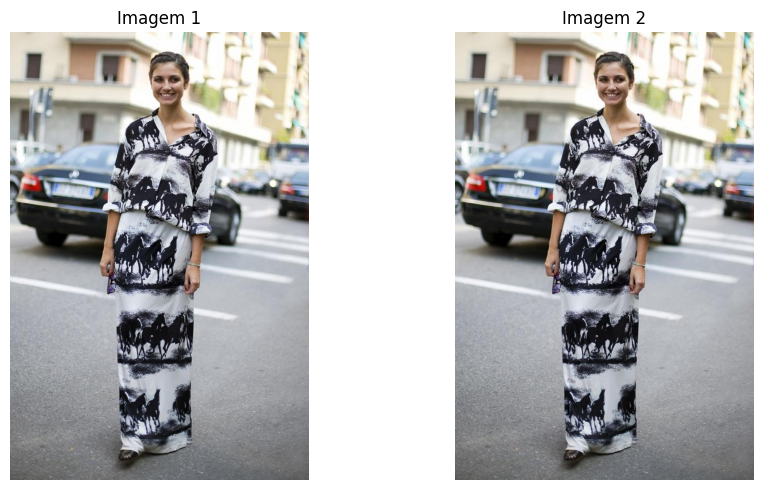

Hash duplicado: a3ead6960c09f1f1, imagens: ['./clothing-coparsing-dataset/images/1790.jpg', './clothing-coparsing-dataset/images/1671.jpg']


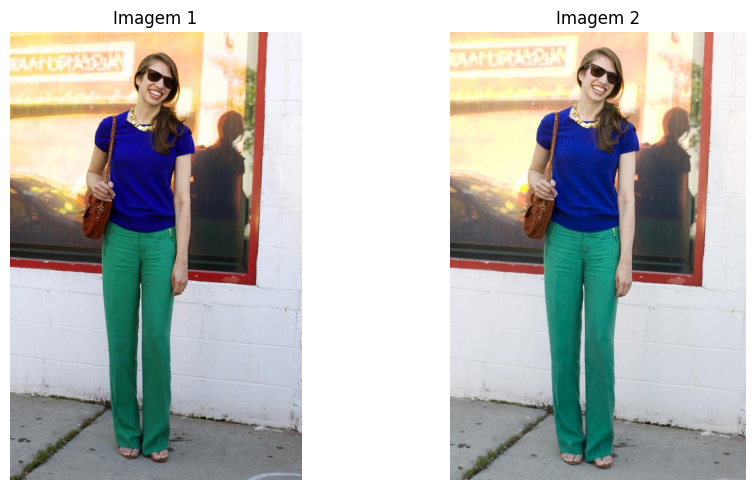

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

print("Iniciando Módulo 6: Distribuição das Classes e Duplicatas...\n")

# Parte 1: Distribuição das Classes
print("Gerando gráfico da quantidade de imagens por classe...")

# Parte 1.5: Verificando duplicatas no metadata
print("\nVerificando duplicatas no metadata...")

# Checar se há duplicatas na coluna 'image_path' do metadata
metadata_duplicates = metadata_df[metadata_df.duplicated(subset=['image_path'], keep=False)]

if metadata_duplicates.empty:
    print("Nenhuma duplicata encontrada no metadata.")
else:
    print(f"Encontradas {metadata_duplicates.shape[0]} entradas duplicadas no metadata:")
    display(metadata_duplicates[['image_id', 'image_path', 'label_type']])

# Tratar valores nulos na coluna 'label'
if 'label' not in df.columns:
    print("A coluna 'label' não existe. Preenchendo com 'Desconhecida'.")
    df['label'] = 'Desconhecida'
else:
    df['label'] = df['label'].fillna('Desconhecida')

class_counts = df['label'].value_counts()
classes = class_counts.index.tolist()
counts = class_counts.values.tolist()

plt.figure(figsize=(10,6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Número de imagens")
plt.title("Distribuição das Classes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nNúmero de imagens por classe:")
for cls, cnt in zip(classes, counts):
    print(f"- {cls}: {cnt} imagens")

# Parte 2: Identificação de Duplicatas
print("\nVerificando imagens duplicadas pelo hash...")

# Detectar duplicatas na coluna 'image_hash'
if 'image_hash' not in df.columns:
    print("A coluna 'image_hash' não existe. Não é possível verificar duplicatas.")
else:
    duplicated_hashes = df[df['image_hash'].duplicated()]['image_hash'].unique()
    if len(duplicated_hashes) == 0:
        print("Nenhuma imagem duplicada encontrada.")
    else:
        print(f"Encontradas {len(duplicated_hashes)} imagens duplicadas.\n")

        # Exibir imagens duplicadas lado a lado
        for h in duplicated_hashes:
            duplicates = df[df['image_hash'] == h]['image_path'].values
            print(f"Hash duplicado: {h}, imagens: {duplicates.tolist()}")

            # Configura o número de colunas do plot
            n = len(duplicates)
            fig, axes = plt.subplots(1, n, figsize=(5*n,5))
            if n == 1:
                axes = [axes]  # garante que seja iterável mesmo com 1 imagem

            for i, img_path in enumerate(duplicates):
                img = cv2.imread(img_path)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[i].imshow(img_rgb)
                axes[i].set_title(f"Imagem {i+1}")
                axes[i].axis('off')

            plt.tight_layout()
            plt.show()

Módulo 7 – Incrementos e Verificações Complementares

Iniciando Módulo 7: Incrementos e Verificações Complementares...

Gerando histogramas de largura e altura das imagens...


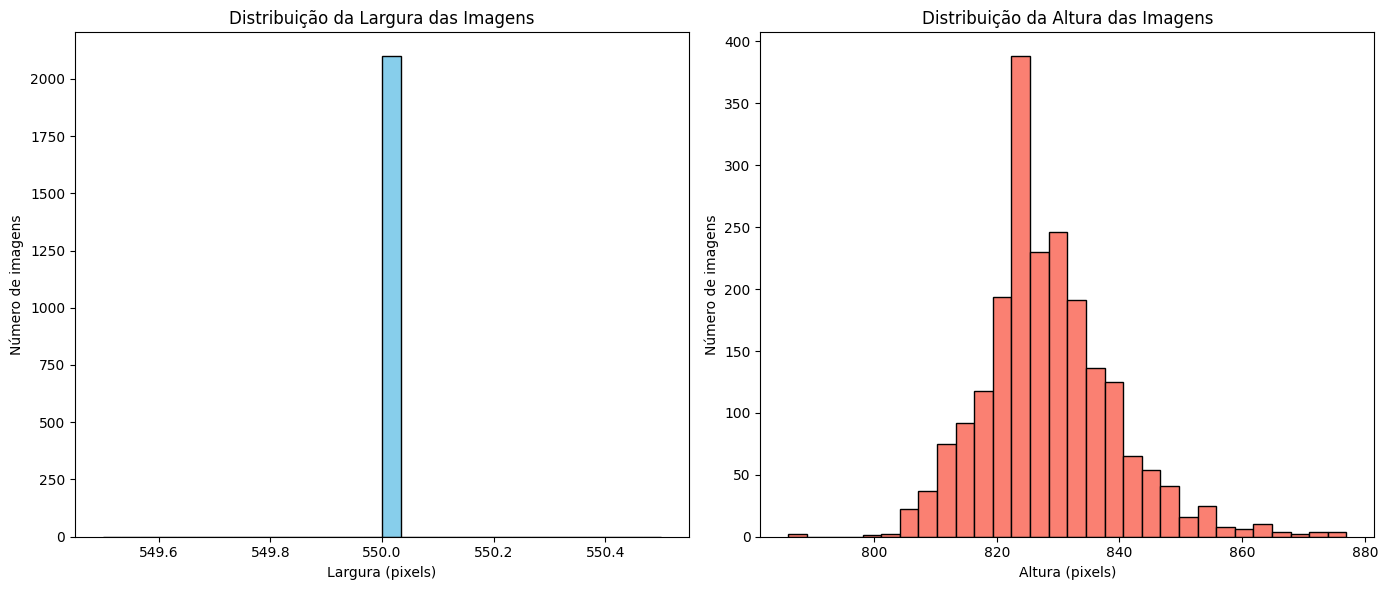

Histogramas gerados.

Verificando duplicatas no metadata.csv...
Total de entradas duplicadas no metadata: 0

Nenhuma entrada duplicada encontrada no metadata.

Gerando gráfico percentual da distribuição de classes...


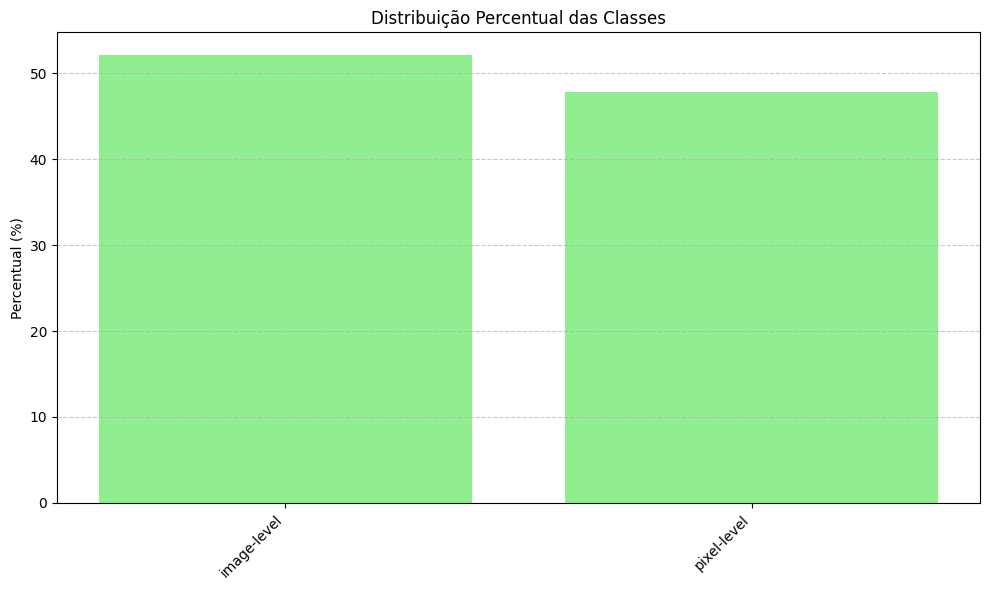


Percentual de imagens por classe:
- image-level: 52.14%
- pixel-level: 47.86%


In [9]:
print("Iniciando Módulo 7: Incrementos e Verificações Complementares...\n")

# 1. Histogramas de dimensões das imagens
print("Gerando histogramas de largura e altura das imagens...")

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(df['width'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribuição da Largura das Imagens")
plt.xlabel("Largura (pixels)")
plt.ylabel("Número de imagens")

plt.subplot(1,2,2)
plt.hist(df['height'], bins=30, color='salmon', edgecolor='black')
plt.title("Distribuição da Altura das Imagens")
plt.xlabel("Altura (pixels)")
plt.ylabel("Número de imagens")

plt.tight_layout()
plt.show()
print("Histogramas gerados.\n")

# 2. Verificação de duplicatas no metadata
print("Verificando duplicatas no metadata.csv...")

duplicates_metadata = metadata_df.duplicated(subset=['image_path', 'label_type']).sum()
print(f"Total de entradas duplicadas no metadata: {duplicates_metadata}\n")

# Se houver duplicatas, listar algumas
if duplicates_metadata > 0:
    print("Exemplos de entradas duplicadas no metadata:")
    print(metadata_df[metadata_df.duplicated(subset=['image_path', 'label_type'], keep=False)].head())
else:
    print("Nenhuma entrada duplicada encontrada no metadata.\n")

# 3. Distribuição percentual das classes
print("Gerando gráfico percentual da distribuição de classes...")

class_counts = df['label'].value_counts()
class_percent = 100 * class_counts / class_counts.sum()

plt.figure(figsize=(10,6))
plt.bar(class_percent.index, class_percent.values, color='lightgreen')
plt.title("Distribuição Percentual das Classes")
plt.ylabel("Percentual (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nPercentual de imagens por classe:")
for cls, pct in zip(class_percent.index, class_percent.values):
    print(f"- {cls}: {pct:.2f}%")

7b. Iniciando Módulo 9: Detecção de Outliers em Dimensões

Iniciando Módulo: Detecção de Outliers em Dimensões...

Estatísticas das imagens:
- Largura: média=550.0, std=0.0
- Altura: média=828.5, std=10.7

Total de imagens outliers: 29

Imagens outliers e suas dimensões:


,image_path,width,height
89,./clothing-coparsing-dataset/images/1593.jpg,550,865
170,./clothing-coparsing-dataset/images/0894.jpg,550,861
358,./clothing-coparsing-dataset/images/0032.jpg,550,871
374,./clothing-coparsing-dataset/images/1883.jpg,550,787
492,./clothing-coparsing-dataset/images/1378.jpg,550,863
547,./clothing-coparsing-dataset/images/0151.jpg,550,872
621,./clothing-coparsing-dataset/images/1354.jpg,550,874
891,./clothing-coparsing-dataset/images/0761.jpg,550,864
942,./clothing-coparsing-dataset/images/1742.jpg,550,862
961,./clothing-coparsing-dataset/images/0137.jpg,550,871


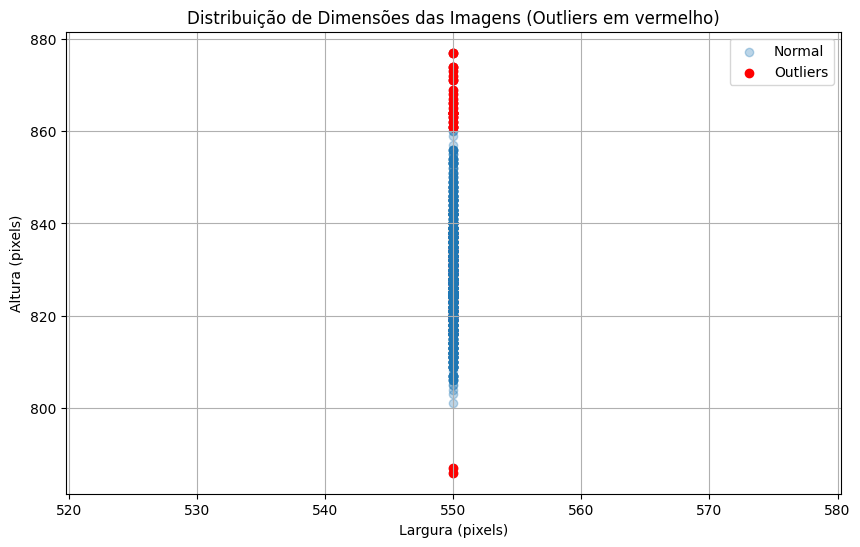

In [14]:
print("Iniciando Módulo: Detecção de Outliers em Dimensões...\n")

# Estatísticas básicas
width_mean = df['width'].mean()
width_std = df['width'].std()
height_mean = df['height'].mean()
height_std = df['height'].std()

print(f"Estatísticas das imagens:")
print(f"- Largura: média={width_mean:.1f}, std={width_std:.1f}")
print(f"- Altura: média={height_mean:.1f}, std={height_std:.1f}\n")

# Limites para definir outliers (±3 desvios padrão)
width_lower = width_mean - 3*width_std
width_upper = width_mean + 3*width_std
height_lower = height_mean - 3*height_std
height_upper = height_mean + 3*height_std

# Identificar outliers
outliers = df[(df['width'] < width_lower) | (df['width'] > width_upper) |
              (df['height'] < height_lower) | (df['height'] > height_upper)]

print(f"Total de imagens outliers: {len(outliers)}\n")

if not outliers.empty:
    print("Imagens outliers e suas dimensões:")
    display(outliers[['image_path', 'width', 'height']])

# Scatter plot destacando outliers
plt.figure(figsize=(10,6))
plt.scatter(df['width'], df['height'], alpha=0.3, label='Normal')
plt.scatter(outliers['width'], outliers['height'], color='red', label='Outliers')
plt.xlabel("Largura (pixels)")
plt.ylabel("Altura (pixels)")
plt.title("Distribuição de Dimensões das Imagens (Outliers em vermelho)")
plt.legend()
plt.grid(True)
plt.show()


Módulo 8 – Top 5 Classes com Maior Número de Imagens

In [11]:
print("\nIniciando Módulo 8: Top 5 Classes por Quantidade de Pixels...\n")

from collections import Counter
import numpy as np
from PIL import Image

# Definindo caminhos das anotações e arquivo de classes
ANNOTATIONS_FOLDER_PATH = os.path.join(BASE_DIR, 'labels', 'pixel_level_labels_colored')
CLASS_DICT_PATH = os.path.join(BASE_DIR, 'class_dict.csv')

# Carregar o arquivo de mapeamento de classes
try:
    df_classes = pd.read_csv(CLASS_DICT_PATH)
    rgb_to_class = {tuple(row[['r','g','b']]): row['class_name'] for _, row in df_classes.iterrows()}
    print(f"Arquivo class_dict.csv carregado com sucesso com {len(df_classes)} classes.\n")
except FileNotFoundError:
    print(f"Erro: class_dict.csv não encontrado em {CLASS_DICT_PATH}")
    raise

# Inicializar contador de pixels por RGB
total_counts = Counter()

# Listar imagens de anotação
image_files = [f for f in os.listdir(ANNOTATIONS_FOLDER_PATH) if f.endswith('.png')]
print(f"Iniciando contagem de pixels em {len(image_files)} imagens de anotação...")

# Contagem de pixels
for i, filename in enumerate(image_files, 1):
    img_path = os.path.join(ANNOTATIONS_FOLDER_PATH, filename)
    try:
        img_array = np.array(Image.open(img_path))
        pixels = img_array.reshape(-1, 3)
        pixel_tuples = [tuple(p) for p in pixels]
        total_counts.update(pixel_tuples)
    except Exception as e:
        print(f"Erro ao processar {filename}: {e}")

print("Contagem de pixels concluída.\n")

# Mapear pixels para classes
final_class_counts = Counter()
unmapped_pixels = 0
for rgb_tuple, count in total_counts.items():
    if rgb_tuple in rgb_to_class:
        final_class_counts[rgb_to_class[rgb_tuple]] += count
    else:
        unmapped_pixels += count

# Exibir as 5 classes com maior número de pixels
top5 = final_class_counts.most_common(5)
print("--- Top 5 Classes por Quantidade de Pixels ---")
for cls, cnt in top5:
    print(f"- {cls}: {cnt} pixels")
if unmapped_pixels > 0:
    print(f"\nObservação: {unmapped_pixels} pixels não puderam ser mapeados.")

# Histograma das 5 classes principais
classes = [str(cls) for cls, _ in top5]
counts = [cnt for _, cnt in top5]

plt.figure(figsize=(8,5))
plt.bar(classes, counts, color='lightgreen')
plt.title("Top 5 Classes por Quantidade de Pixels")
plt.xlabel("Classe")
plt.ylabel("Número de Pixels")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Iniciando Módulo 8: Top 5 Classes por Quantidade de Pixels...

Arquivo class_dict.csv carregado com sucesso com 59 classes.

Iniciando contagem de pixels em 1004 imagens de anotação...


KeyboardInterrupt: 

Módulo 9 – Incrementos Visuais e Estatísticos

Iniciando Módulo 9: Incrementos Visuais e Estatísticos...



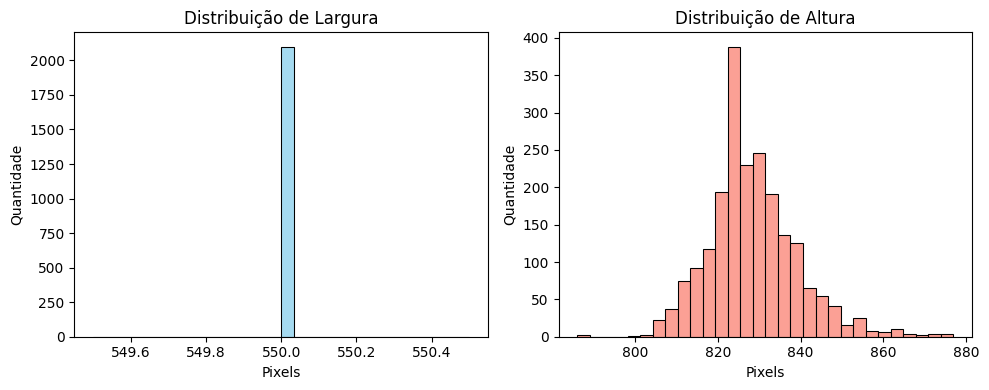

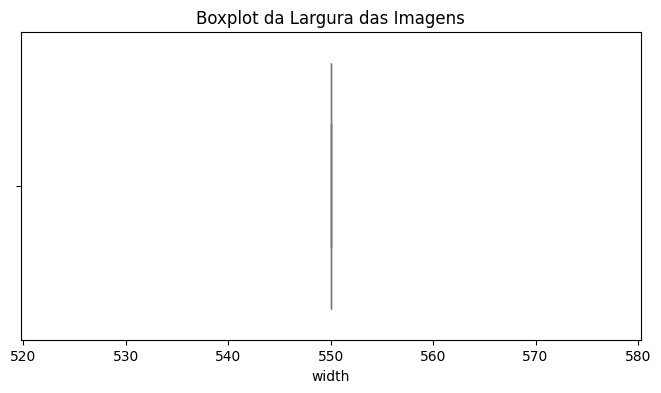

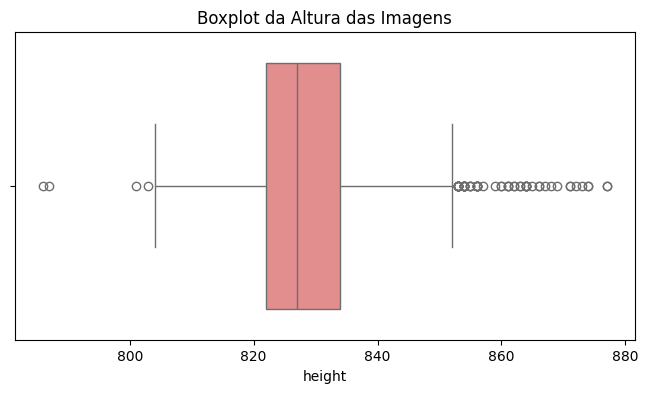

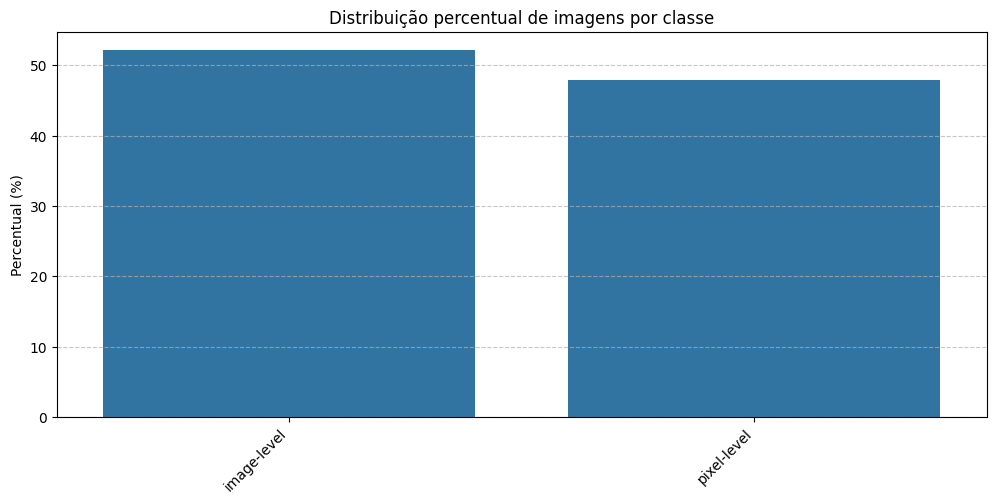

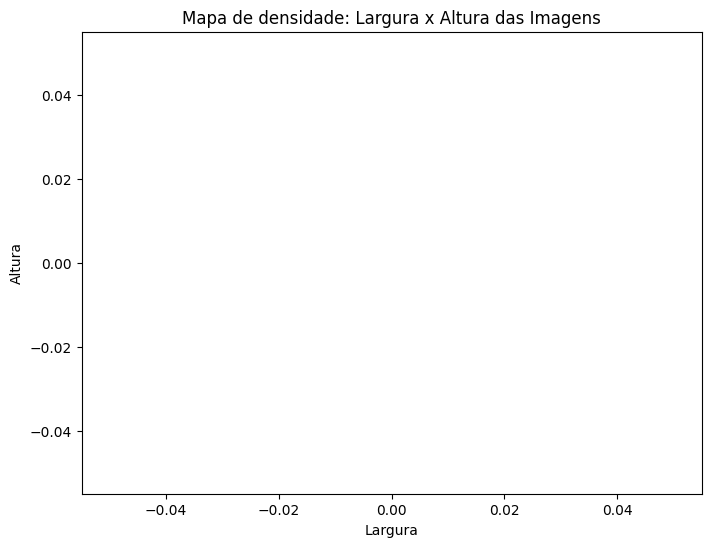

Nenhuma imagem corrompida encontrada.


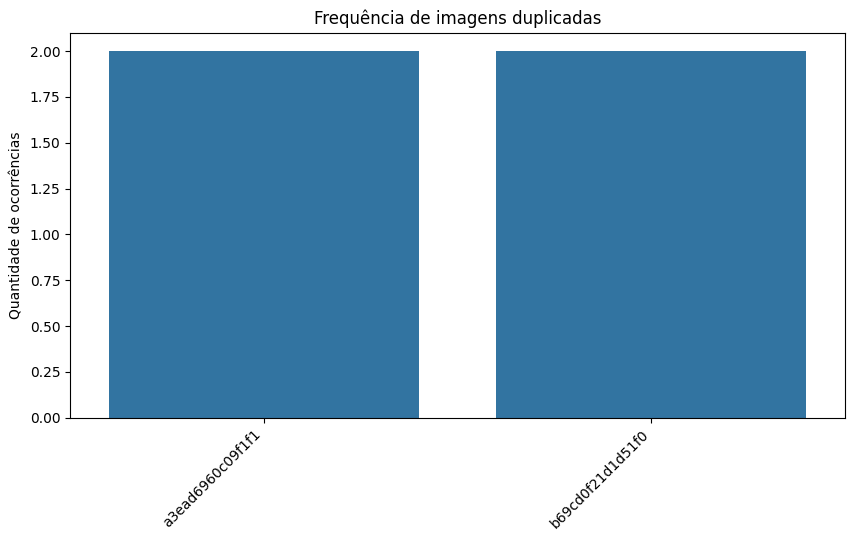

Iniciando contagem de pixels por classe...

Iniciando contagem de pixels em 1004 imagens de anotação...
Processadas 100/1004 imagens


In [ ]:
print("Iniciando Módulo 9: Incrementos Visuais e Estatísticos...\n")

import seaborn as sns
from collections import Counter
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ---------- 1. Distribuição detalhada das dimensões ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['width'].dropna(), bins=30, color='skyblue')
plt.title("Distribuição de Largura")
plt.xlabel("Pixels")
plt.ylabel("Quantidade")

plt.subplot(1,2,2)
sns.histplot(df['height'].dropna(), bins=30, color='salmon')
plt.title("Distribuição de Altura")
plt.xlabel("Pixels")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(8,4))
sns.boxplot(x=df['width'].dropna(), color='lightblue')
plt.title("Boxplot da Largura das Imagens")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['height'].dropna(), color='lightcoral')
plt.title("Boxplot da Altura das Imagens")
plt.show()

# ---------- 2. Distribuição percentual das classes ----------
df['label'] = df['label'].fillna('Desconhecida')
class_counts = df['label'].value_counts()
class_percent = class_counts / class_counts.sum() * 100

plt.figure(figsize=(12,5))
sns.barplot(x=list(class_percent.index), y=list(class_percent.values), dodge=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentual (%)")
plt.title("Distribuição percentual de imagens por classe")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------- 3. Heatmap de largura x altura ----------
# Evitar NaNs e valores inválidos
widths = df['width'].dropna()
heights = df['height'].dropna()
if len(widths) > 1 and len(heights) > 1:
    plt.figure(figsize=(8,6))
    sns.kdeplot(x=widths, y=heights, fill=True, cmap="magma", bw_adjust=0.5, warn_singular=False)
    plt.title("Mapa de densidade: Largura x Altura das Imagens")
    plt.xlabel("Largura")
    plt.ylabel("Altura")
    plt.show()
else:
    print("Heatmap não pode ser gerado: dados insuficientes ou constantes.")

# ---------- 4. Visualização de imagens corrompidas ----------
corrupted_list = df[df['corrupted']==True]['image_path'].tolist()
if corrupted_list:
    fig, axes = plt.subplots(1, min(5,len(corrupted_list)), figsize=(15,5))
    for i, img_path in enumerate(corrupted_list[:5]):
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
        except:
            axes[i].text(0.5,0.5,'Corrompida', ha='center', va='center', fontsize=12)
        axes[i].axis('off')
    plt.show()
else:
    print("Nenhuma imagem corrompida encontrada.")

# ---------- 5. Duplicatas ----------
if 'image_hash' in df.columns:
    dup_hash_counts = df['image_hash'].value_counts()
    duplicates = dup_hash_counts[dup_hash_counts>1]
    if not duplicates.empty:
        plt.figure(figsize=(10,5))
        sns.barplot(x=list(duplicates.index.astype(str)), y=list(duplicates.values), dodge=False)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel("Quantidade de ocorrências")
        plt.title("Frequência de imagens duplicadas")
        plt.show()



# ---------- 6. Top classes por pixels ----------
ANNOTATIONS_FOLDER_PATH = os.path.join(BASE_DIR, 'labels', 'pixel_level_labels_colored')
CLASS_DICT_PATH = os.path.join(BASE_DIR, 'class_dict.csv')

if os.path.exists(ANNOTATIONS_FOLDER_PATH) and os.path.exists(CLASS_DICT_PATH):
    print("Iniciando contagem de pixels por classe...\n")

    # Carregar CSV de cores para classes
    df_classes = pd.read_csv(CLASS_DICT_PATH)
    rgb_to_class = {tuple(row[['r','g','b']]): row['class_name'] for _, row in df_classes.iterrows()}

    # Inicializa o contador de pixels
    total_counts = Counter()
    image_files = [f for f in os.listdir(ANNOTATIONS_FOLDER_PATH) if f.endswith('.png')]
    print(f"Iniciando contagem de pixels em {len(image_files)} imagens de anotação...")

    for i, filename in enumerate(image_files, 1):
        img_path = os.path.join(ANNOTATIONS_FOLDER_PATH, filename)
        img = np.array(Image.open(img_path))

        if img.ndim == 3 and img.shape[2] == 3:
            # Converter array 3D para lista de tuplas RGB
            pixels = [tuple(px) for px in img.reshape(-1, 3)]
            counts = Counter(pixels)

            # Mapear pixels para classes
            for rgb, c in counts.items():
                if rgb in rgb_to_class:
                    total_counts[rgb_to_class[rgb]] += c

        if i % 100 == 0 or i == len(image_files):
            print(f"Processadas {i}/{len(image_files)} imagens")

    # Top 10 classes
    top_classes = total_counts.most_common(10)
    classes, pixels = zip(*top_classes)

    plt.figure(figsize=(12,5))
    sns.barplot(x=list(classes), y=list(pixels), dodge=False, palette="coolwarm")
    plt.title("Top 10 classes por quantidade de pixels")
    plt.ylabel("Número de pixels")
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("\n--- Top 10 Classes por Quantidade de Pixels ---")
    for cls, px in top_classes:
        print(f"- {cls}: {px} pixels")

else:
    print("Não foi possível localizar pasta de labels ou arquivo class_dict.csv.")

print("\nMódulo 9 finalizado: Incrementos Visuais e Estatísticos concluídos.")
